# 1. Download and unzip data

ISIC 2016

In [1]:
# !wget https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_Data.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Test_Data.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Training_GroundTruth.csv
# !wget https://isic-challenge-data.s3.amazonaws.com/2016/ISBI2016_ISIC_Part3_Test_GroundTruth.csv

In [2]:
# !unzip "./ISBI2016_ISIC_Part3_Test_Data.zip"
# !unzip "./ISBI2016_ISIC_Part3_Training_Data.zip"

ISIC 2017

In [3]:
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Data.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Training_Part3_GroundTruth.csv
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Data.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Validation_Part3_GroundTruth.csv
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Data.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2017/ISIC-2017_Test_v2_Part3_GroundTruth.csv
# !unzip "./ISIC-2017_Training_Data.zip"
# !unzip "./ISIC-2017_Validation_Data.zip"
# !unzip "./ISIC-2017_Test_v2_Data.zip"

ISIC 2018

In [4]:
# !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_Input.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Training_GroundTruth.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_Input.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Validation_GroundTruth.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_Input.zip
# !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task3_Test_GroundTruth.zip

In [5]:
# !unzip "./ISIC2018_Task3_Training_Input.zip"
# !unzip "./ISIC2018_Task3_Training_GroundTruth.zip"
# !unzip "./ISIC2018_Task3_Validation_Input.zip"
# !unzip "./ISIC2018_Task3_Validation_GroundTruth.zip"
# !unzip "./ISIC2018_Task3_Test_Input.zip"
# !unzip "./ISIC2018_Task3_Test_GroundTruth.zip"

In [6]:
import os
import shutil
import pandas as pd
import numpy as np

# 2. Make training, validation and test image folders by training and test csv files
[ImageFolder](https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html)

In [7]:
""" Create Directories """
# train
os.makedirs('./train', exist_ok=True)
os.makedirs('./train/benign', exist_ok=True)
os.makedirs('./train/malignant', exist_ok=True)
# validation
os.makedirs('./val', exist_ok=True)
os.makedirs('./val/benign', exist_ok=True)
os.makedirs('./val/malignant', exist_ok=True)
# test
os.makedirs('./test', exist_ok=True)
os.makedirs('./test/benign', exist_ok=True)
os.makedirs('./test/malignant', exist_ok=True)

2016

In [8]:
""" Create Directories """
# train
os.makedirs('./train', exist_ok=True)
os.makedirs('./train/benign', exist_ok=True)
os.makedirs('./train/malignant', exist_ok=True)
# validation
os.makedirs('./val', exist_ok=True)
os.makedirs('./val/benign', exist_ok=True)
os.makedirs('./val/malignant', exist_ok=True)
# test
os.makedirs('./test', exist_ok=True)
os.makedirs('./test/benign', exist_ok=True)
os.makedirs('./test/malignant', exist_ok=True)



df = pd.read_csv("./ISBI2016_ISIC_Part3_Training_GroundTruth.csv")
img_lis = []
lbl_lis = []
img_lis.append("ISIC_0000000")
lbl_lis.append("benign")
for i in range(len(df)):
    name, label = df["ISIC_0000000"][i], df["benign"][i]
    img_lis.append(name)
    lbl_lis.append(label)
N_train_val = len(img_lis)
N_train = int(N_train_val * 0.8)
print(N_train_val)
print(N_train)
shuffle_ix = np.random.permutation(np.arange(N_train_val))
ix_train = shuffle_ix[:N_train]
ix_val = shuffle_ix[N_train:]
for i in ix_train:
    name, label = img_lis[i], lbl_lis[i]
    shutil.copy("./ISBI2016_ISIC_Part3_Training_Data/"+name+".jpg", "./train/"+label+"/"+name+".jpg")
for i in ix_val:
    name, label = img_lis[i], lbl_lis[i]
    shutil.copy("./ISBI2016_ISIC_Part3_Training_Data/"+name+".jpg", "./val/"+label+"/"+name+".jpg")

if not os.path.exists("./test"):
    os.makedirs("./test")
    os.makedirs("./test/benign")
    os.makedirs("./test/malignant")
df = pd.read_csv("./ISBI2016_ISIC_Part3_Test_GroundTruth.csv")
shutil.copy("./ISBI2016_ISIC_Part3_Test_Data/ISIC_0000003.jpg", "./test/benign/ISIC_0000003.jpg")
for i in range(len(df)):
    name, label = df["ISIC_0000003"][i], df["0.0"][i]
    label = "benign" if label == 0 else "malignant"
    shutil.copy("./ISBI2016_ISIC_Part3_Test_Data/"+name+".jpg", "./test/"+label+"/"+name+".jpg")

Train data size: 900
Val data size: 190
Test data size: 189
Train classes: Benign: 727, Malignant: 173
Val classes: Benign: 148, Malignant: 42
Test classes: Benign: 156, Malignant: 33


In [9]:
""" Read CSV files """
df_train = pd.read_csv("./ISIC-2017_Training_Part3_GroundTruth.csv")
df_val = pd.read_csv("./ISIC-2017_Validation_Part3_GroundTruth.csv")
df_test = pd.read_csv("./ISIC-2017_Test_v2_Part3_GroundTruth.csv")

# drop other classes, only categorize as malignant or benign
df_train = df_train.drop(columns=['seborrheic_keratosis'], axis=1)
df_val = df_val.drop(columns=['seborrheic_keratosis'], axis=1)

In [ ]:
df_train.head(1)

In [11]:
""" Move data to folder """
train_size = len(df_train)
val_size = len(df_val)

print(f"Train data size: {train_size}\nVal data size: {val_size}")

# setup training data
num_train_benign=0
num_train_malignant=0
for i in range(train_size):
  name, label = df_train.iloc[i,0], df_train.iloc[i,1]
  # print(name, label)
  # copy into training directory
  if label == 0:
    label = "benign"
    num_train_benign+=1
  else:
    label = "malignant"
    num_train_malignant+=1
  shutil.copy("./ISIC-2017_Training_Data/"+name+".jpg", "./train/"+label+"/"+name+"_2017.jpg")

# setup validation data
num_val_benign=0
num_val_malignant=0
for i in range(val_size):
  name, label = df_val.iloc[i,0], df_val.iloc[i,1]
  # print(name, label)
  # copy into training directory
  if label == 0:
    label = "benign"
    num_val_benign+=1
  else:
    label = "malignant"
    num_val_malignant+=1
  shutil.copy("./ISIC-2017_Validation_Data/"+name+".jpg", "./val/"+label+"/"+name+"_2017.jpg")



Train data size: 2000
Val data size: 150


2018

In [12]:
""" Read CSV files """
df_train = pd.read_csv("./ISIC2018_Task3_Training_GroundTruth.csv")
df_val = pd.read_csv("./ISIC2018_Task3_Validation_GroundTruth.csv")

# remove other classes, only categorize between benign and malignant
df_train = df_train.drop(columns=['NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], axis=1)
df_val = df_val.drop(columns=['NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], axis=1)

In [ ]:
df_train.head(5)

In [13]:
""" Move data to folder """
train_size = len(df_train)
val_size = len(df_val)

print(f"Train data size: {train_size}\nVal data size: {val_size}")

# setup training data
num_train_benign=0
num_train_malignant=0
for i in range(train_size):
  name, label = df_train.iloc[i,0], df_train.iloc[i,1]
  # print(name, label)
  # copy into training directory
  if label == 0:
    label = "benign"
    num_train_benign+=1
  else:
    label = "malignant"
    num_train_malignant+=1
  shutil.copy("./ISIC2018_Task3_Training_Input/"+name+".jpg", "./train/"+label+"/"+name+"_2018.jpg")

# setup validation data
num_val_benign=0
num_val_malignant=0
for i in range(val_size):
  name, label = df_val.iloc[i,0], df_val.iloc[i,1]
  # print(name, label)
  # copy into training directory
  if label == 0:
    label = "benign"
    num_val_benign+=1
  else:
    label = "malignant"
    num_val_malignant+=1
  shutil.copy("./ISIC2018_Task3_Validation_Input/"+name+".jpg", "./val/"+label+"/"+name+"_2018.jpg")


Train data size: 10015
Val data size: 193


In [14]:
!ls -l ./train/benign | wc -l
!ls -l ./train/malignant | wc -l
!ls -l ./val/benign | wc -l
!ls -l ./val/malignant | wc -l

11256
1661
441
94


# 3. Prepare data and build dataloaders

Fourier Transformation Functions

In [28]:
from PIL import Image
# Step 1: Define the Fourier Transformation Functions
def fft_shift(image):
    """ Shift the zero-frequency component to the center of the spectrum. """
    return np.fft.fftshift(np.fft.fft2(image))

def ifft_shift(image):
    """ Inverse shift and inverse FFT to get back to spatial domain. """
    return np.fft.ifft2(np.fft.ifftshift(image)).real

def random_phase_shift(image):
    """ Apply a random phase shift in the Fourier domain. """
    # Perform FFT
    image_fft = fft_shift(image)
    magnitude = np.abs(image_fft)
    phase = np.angle(image_fft)
    
    # Add random phase shift
    random_shift = np.random.uniform(-np.pi, np.pi, phase.shape)
    phase_shifted = phase + random_shift
    
    # Construct new FFT with original magnitude and shifted phase
    new_fft = magnitude * np.exp(1j * phase_shifted)
    
    # Perform inverse FFT
    new_image = ifft_shift(new_fft)
    return new_image

class FourierTransform(object):
    def __call__(self, image):
        image_np = np.array(image)
        if image_np.ndim == 3:  # For RGB images
            channels = []
            for i in range(3):
                channel = image_np[:,:,i]
                channel_augmented = random_phase_shift(channel)
                channels.append(channel_augmented)
            image_np = np.stack(channels, axis=-1)
        else:  # For grayscale images
            image_np = random_phase_shift(image_np)
            
        return Image.fromarray(np.uint8(image_np.clip(0, 255)))

In [29]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch


root_train, root_val, root_test = './train', './val', './test'

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    FourierTransform(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])





def get_train_test_set(batch_size):
    train_dataset = ImageFolder(root_train, transform=train_transform)
    loader_train = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=batch_size,
        shuffle=True
        )

    val_dataset = ImageFolder(root_val, transform=test_transform)
    loader_val = torch.utils.data.DataLoader(
        dataset=val_dataset,
        batch_size=batch_size,
        shuffle=False
        )

    test_dataset = ImageFolder(root_test, transform=test_transform)
    loader_test = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=batch_size,
        shuffle=False
        )

    return loader_train, loader_val, loader_test

batch_size = 16
loader_train, loader_val, loader_test = get_train_test_set(batch_size)

# 4. Build the network

## Implement ResNet50

In [30]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.models import resnet50

class Bottleneck(nn.Module):
    '''
    The single block in ResNet
    '''
    expansion = 4
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv3(out)
        out = self.bn3(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, use_fc=False, dropout=None):
        self.inplanes = 64
        super(ResNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # stacking layers
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AvgPool2d(7, stride=1)

        self.use_fc = use_fc
        self.use_dropout = True if dropout else False
        if self.use_fc:
            print('Using fc.')
            self.fc_add = nn.Linear(512*block.expansion, 512)
        if self.use_dropout:
            print('Using dropout.')
            self.dropout = nn.Dropout(p=dropout)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        '''
        Buiding ResNet layer by stacking blocks
        '''
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        return nn.Sequential(*layers)

    def forward(self, x, *args):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.mean(dim=(-2, -1))
        x = x.view(x.size(0), -1)
        if self.use_fc:
            x = F.relu(self.fc_add(x))
        if self.use_dropout:
            x = self.dropout(x)
        return x

def get_resnet50(pre_trained=True):
    Resnet50 = ResNet(Bottleneck, [3, 4, 6, 3], dropout=None)
    if pre_trained:
        pre_trained = resnet50(weights = "IMAGENET1K_V2").state_dict()
        new_weights = {k: pre_trained[k] for k in Resnet50.state_dict()}
        Resnet50.load_state_dict(new_weights)
    return Resnet50

## Create Classification Model

In [31]:
class ClassificationModel(nn.Module):
    def __init__(self, encoder, num_classes=1):
        super(ClassificationModel, self).__init__()
        self.encoder = encoder
        self.classifier = nn.Linear(2048, num_classes)
    def forward(self, x):
        x = self.encoder(x)
        x = self.classifier(x)
        return x

resnet50 = get_resnet50(pre_trained=True)
model = ClassificationModel(resnet50, 1)

### 5. Train and test your model

In [32]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch
from tqdm import tqdm
import numpy as np
import torch.nn as nn
from sklearn.metrics import roc_auc_score, accuracy_score

In [33]:
import gc
# reset GPU memory if needed
def reset_gpu_mem():
    gc.collect()
    torch.cuda.empty_cache()

In [34]:
reset_gpu_mem()

In [35]:
max_epoch = 10
use_cuda = torch.cuda.is_available()
if use_cuda:
    model = model.cuda()
    
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


loss_list, val_loss_list = [], [] # record the training loss
auc_train_list, acc_train_list = [], [] # record the training metrics
auc_val_list, acc_val_list = [], [] # record the validation metrics

for epoch in range(max_epoch):
    print(" -- Epoch {}/{}".format(epoch + 1, max_epoch))

    ### training the model
    model.train()
    running_loss = 0.0
    train_lbl = []
    train_pred = []
    for data in tqdm(loader_train):
        optimizer.zero_grad()
        images, labels = data
        labels = labels.float()
        if use_cuda:
            images = images.cuda()
            labels = labels.float().cuda()
        outputs = model(images)[:,0]
        outputs = torch.sigmoid(outputs)
        loss = criterion(outputs, labels)
        ### focal loss
        # loss = focal_loss.sigmoid_focal_loss(outputs, labels, reduction='mean')
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        y_scores = list(outputs.detach().cpu().numpy())
        y_true = list(labels.detach().cpu().numpy())
        train_lbl += y_true
        train_pred += y_scores

    ### record the training loss and metrics
    # -- write your codes here
    loss = running_loss / len(loader_train)
    loss_list.append(loss)
    train_lbl, train_pred = np.array(train_lbl), np.array(train_pred)
    train_pred_lbl = np.around(train_pred) # pred >= 0.5 pred_lbl = 1 else pred_lbl = 0
    train_auc = roc_auc_score(train_lbl, train_pred)
    train_acc = accuracy_score(train_lbl, train_pred_lbl)
    auc_train_list.append(train_auc)
    acc_train_list.append(train_acc)


    ### evaluate on validation set
    model.eval()
    test_lbl, test_pred = [], []
    val_loss = 0.0
    for data in loader_val:
        test_images, test_labels = data
        test_labels = test_labels.float()
        if use_cuda:
            test_images = test_images.cuda()
            test_labels = test_labels.float().cuda()
        with torch.no_grad():
            test_outputs = model(test_images)[:, 0]
        test_outputs = torch.sigmoid(test_outputs)
        y_scores = list(test_outputs.detach().cpu().numpy())
        y_true = list(test_labels.detach().cpu().numpy())
        test_lbl += y_true
        test_pred += y_scores
        
        v_loss = criterion(test_outputs, test_labels)
        # v_loss = focal_loss.sigmoid_focal_loss(test_outputs, test_labels, reduction='mean')
        val_loss += v_loss.item()

    ### record the validation loss and metrics, save the best checkpoint
    test_lbl, test_pred = np.array(test_lbl), np.array(test_pred)
    test_pred_lbl = np.around(test_pred) # pred >= 0.5 pred_lbl = 1 else pred_lbl = 0
    test_auc = roc_auc_score(test_lbl, test_pred)
    test_acc = accuracy_score(test_lbl, test_pred_lbl)
    auc_val_list.append(test_auc)
    acc_val_list.append(test_acc)
    val_loss = val_loss / len(loader_val)
    val_loss_list.append(val_loss)
    print(f'Train Loss: {loss}, Val Loss: {val_loss}, Train AUC: {train_auc}, Val AUC: {test_auc}, Train Acc: {train_acc}, Val Acc: {test_acc}')


### evaluate on test set
model.eval()
test_lbl, test_pred = [], []
for data in loader_test:
    test_images, test_labels = data
    test_labels = test_labels.float()
    if use_cuda:
        test_images = test_images.cuda()
        test_labels = test_labels.float().cuda()
    test_outputs = model(test_images)[:, 0]
    test_outputs = torch.sigmoid(test_outputs)
    y_scores = list(test_outputs.detach().cpu().numpy())
    y_true = list(test_labels.detach().cpu().numpy())
    test_lbl += y_true
    test_pred += y_scores

### compute and print the metrics on test set
test_lbl, test_pred = np.array(test_lbl), np.array(test_pred)
test_pred_lbl = np.around(test_pred) # pred >= 0.5 pred_lbl = 1 else pred_lbl = 0
test_auc = roc_auc_score(test_lbl, test_pred)
test_acc = accuracy_score(test_lbl, test_pred_lbl)
print("\nSupervised Model (Baseline) Test Results")
print(f'Test AUC: {test_auc}, Test Accuracy: {test_acc}')

 -- Epoch 1/10


  0%|          | 0/808 [00:00<?, ?it/s]

100%|█████████▉| 807/808 [08:18<00:00,  1.43it/s]/home/jamesyoung/Documents/School/elec4840/venv/lib/python3.10/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
100%|██████████| 808/808 [08:18<00:00,  1.62it/s]


Train Loss: 0.3907238848341426, Val Loss: 0.47338607118410225, Train AUC: 0.5775095941295167, Val AUC: 0.6507575757575759, Train Acc: 0.870460704607046, Val Acc: 0.8255159474671669
 -- Epoch 2/10


100%|██████████| 808/808 [08:11<00:00,  1.64it/s]


Train Loss: 0.37142133861226906, Val Loss: 0.454926716930726, Train AUC: 0.6373378097017122, Val AUC: 0.7002443792766374, Train Acc: 0.8713124274099884, Val Acc: 0.8255159474671669
 -- Epoch 3/10


100%|██████████| 808/808 [08:19<00:00,  1.62it/s]


Train Loss: 0.3701067018221215, Val Loss: 0.4592907818801263, Train AUC: 0.6405376459190828, Val AUC: 0.6876099706744867, Train Acc: 0.8713124274099884, Val Acc: 0.8255159474671669
 -- Epoch 4/10


100%|██████████| 808/808 [08:15<00:00,  1.63it/s]


Train Loss: 0.36570807593404364, Val Loss: 0.4578692522995612, Train AUC: 0.657745045040223, Val AUC: 0.6755865102639296, Train Acc: 0.8713124274099884, Val Acc: 0.8236397748592871
 -- Epoch 5/10


100%|██████████| 808/808 [08:11<00:00,  1.64it/s]


Train Loss: 0.3622196785699908, Val Loss: 0.4166910683407503, Train AUC: 0.6660669688973575, Val AUC: 0.7625366568914955, Train Acc: 0.8710801393728222, Val Acc: 0.8236397748592871
 -- Epoch 6/10


100%|██████████| 808/808 [08:13<00:00,  1.64it/s]


Train Loss: 0.35883780484004774, Val Loss: 0.46481826638474183, Train AUC: 0.6805400544871624, Val AUC: 0.6718475073313782, Train Acc: 0.8723190089043747, Val Acc: 0.8255159474671669
 -- Epoch 7/10


100%|██████████| 808/808 [08:14<00:00,  1.63it/s]


Train Loss: 0.3590732239979771, Val Loss: 0.41487963322330923, Train AUC: 0.6825601740591866, Val AUC: 0.7733626588465299, Train Acc: 0.8716995741385986, Val Acc: 0.8180112570356473
 -- Epoch 8/10


100%|██████████| 808/808 [08:13<00:00,  1.64it/s]


Train Loss: 0.3604218874237325, Val Loss: 0.4679907130844453, Train AUC: 0.681618798606242, Val AUC: 0.65588954056696, Train Acc: 0.8711575687185443, Val Acc: 0.8292682926829268
 -- Epoch 9/10


100%|██████████| 808/808 [08:11<00:00,  1.64it/s]


Train Loss: 0.35459162964310387, Val Loss: 0.4702321238377515, Train AUC: 0.6980809332398452, Val AUC: 0.7603616813294233, Train Acc: 0.8706929926442122, Val Acc: 0.8123827392120075
 -- Epoch 10/10


100%|██████████| 808/808 [08:11<00:00,  1.64it/s]


Train Loss: 0.3519022631837, Val Loss: 0.44373564115341974, Train AUC: 0.7033084091140217, Val AUC: 0.756622678396872, Train Acc: 0.8727835849787069, Val Acc: 0.8236397748592871

Supervised Model (Baseline) Test Results
Test AUC: 0.756622678396872, Test Accuracy: 0.8236397748592871


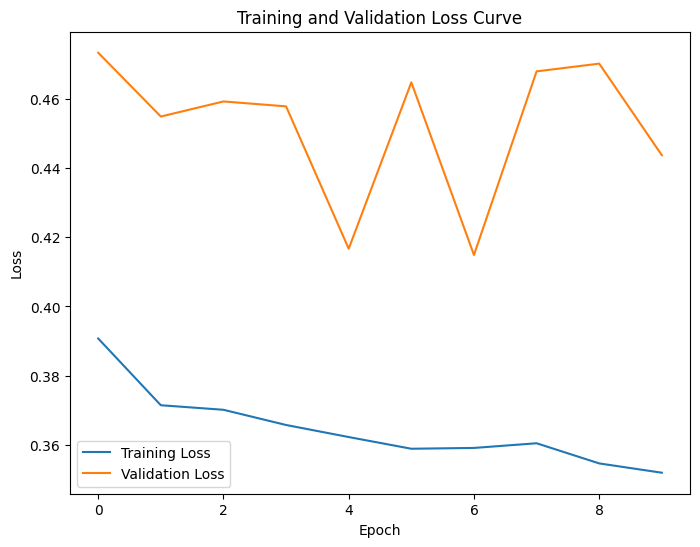

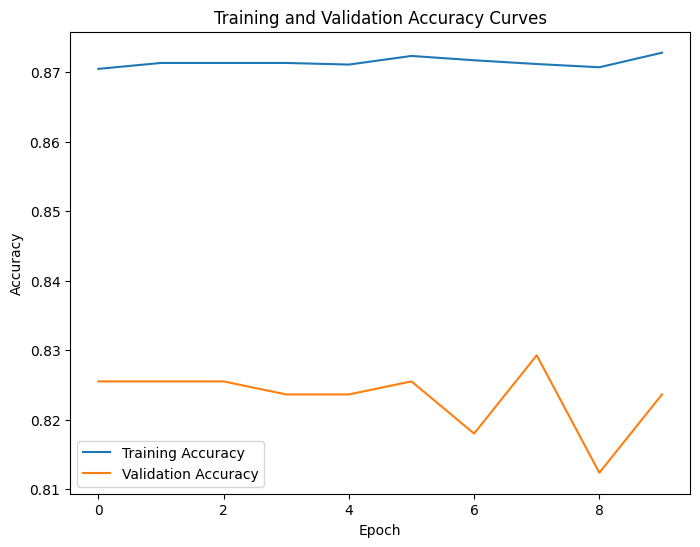

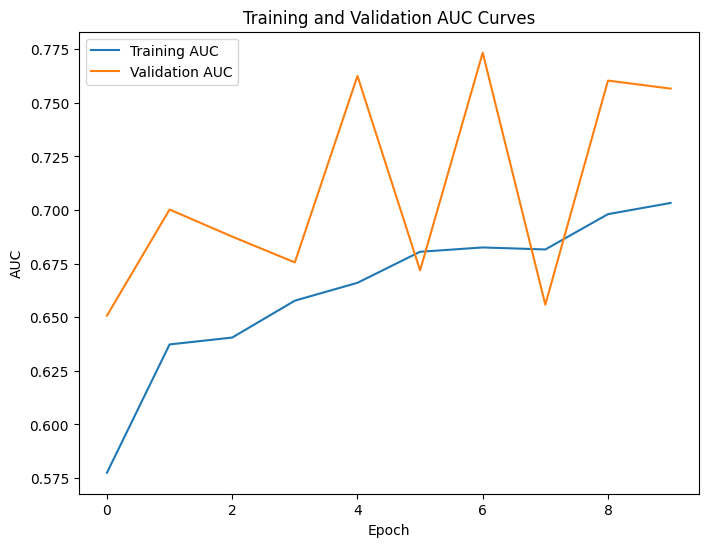

In [36]:
import matplotlib.pyplot as plt

# Plotting the training loss curve
plt.figure(figsize=(8, 6))
plt.plot(loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()

# Plotting the training and testing accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(acc_train_list, label='Training Accuracy')
plt.plot(acc_val_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()
plt.show()

# Plotting the training and testing accuracy curves
plt.figure(figsize=(8, 6))
plt.plot(auc_train_list, label='Training AUC')
plt.plot(auc_val_list, label='Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('Training and Validation AUC Curves')
plt.legend()
plt.show()

In [ ]:
acc_train_list